Importing Libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\MLProject\Dataset\stud.csv")

Data Checks need to perform
    Checking missing values
    check duplicates
    check data types
    check the number of unique values of each column
    check various catagories present in the different categorical columns

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print(df.duplicated().sum())

0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
print("categories in gender variable: ",end= " ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable: ",end= " ")
print(df['race/ethnicity'].unique())

print("categories in parental level of education variable: ",end= " ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable: ",end= " ")
print(df['lunch'].unique())

categories in gender variable:  ['female' 'male']
categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']


In [23]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [26]:
df['Total_score'] = df['math score']+df['reading score']+df['writing score']
df['Average']= round(df['total_score']/len(numerical_features),2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33,229,76.33


In [28]:
df.drop(columns=['total_score','average'],inplace=True)

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [35]:
df[df['math score']==100]['Average'].count()

np.int64(7)

<Axes: xlabel='Average', ylabel='Count'>

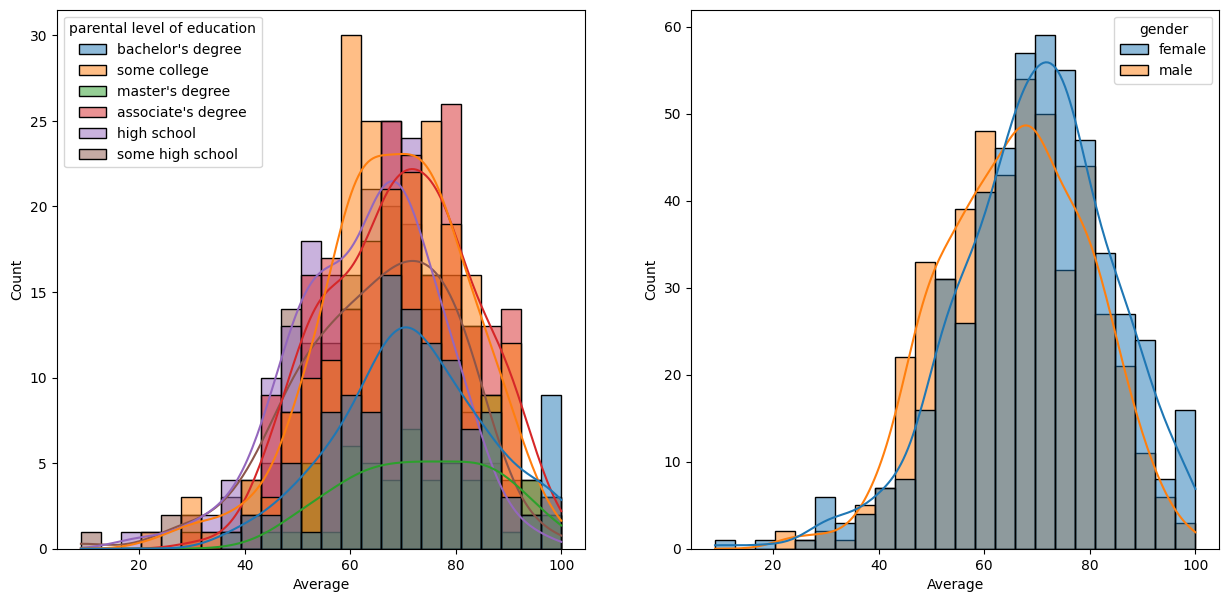

In [46]:
import seaborn as sns
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(122)
sns.histplot(data=df,x='Average',hue='gender',kde=True)